In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import and read the cleaned data 
hotel_df=pd.read_csv("../Resources/hotel_reservations.csv")
print(hotel_df.shape)

# print(hotel_df.columns)
# hotel_df.head()

(119390, 32)


In [3]:
# Eliminate duplication in the dataset
hotel_df1=hotel_df.drop_duplicates()
print(hotel_df1.shape)

(87396, 32)


In [4]:
# Drop agent and company columns 
hotel_df1_clean=hotel_df1.drop(["company","agent"],axis=1)

# Drop the null rows
hotel_df1_clean=hotel_df1_clean.dropna()

In [5]:
# Drop rows with not sufficinet information (Adult=0 and children=0)
hotel_df1_clean=hotel_df1_clean.drop(hotel_df1_clean[(hotel_df1_clean.adults==0) & (hotel_df1_clean.children==0)].index)
hotel_df1_clean.shape

(86779, 30)

In [6]:
# Split reservation_status_date to day, month and year
hotel_df1_clean[["year", "month", "day"]] = hotel_df1_clean["reservation_status_date"].str.split("-", expand = True)
hotel_df1_clean=hotel_df1_clean.drop(["reservation_status_date"],axis=1)
hotel_df1_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,year,month,day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015,07,01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015,07,01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015,07,02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015,07,02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015,07,03


## Number of booking based on hotel¶

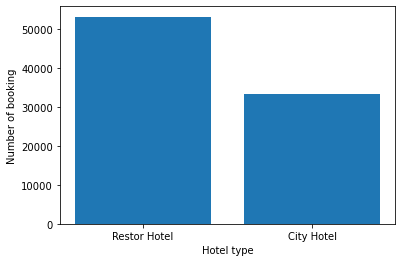

In [7]:
fig = plt.figure()
name=['Restor Hotel','City Hotel']
num_hotel=hotel_df1_clean.groupby(["hotel"]).count()['is_canceled']
plt.bar(name,num_hotel)
plt.xlabel("Hotel type")
plt.ylabel("Number of booking")
plt.show()

## Number of cancellations based on hotel

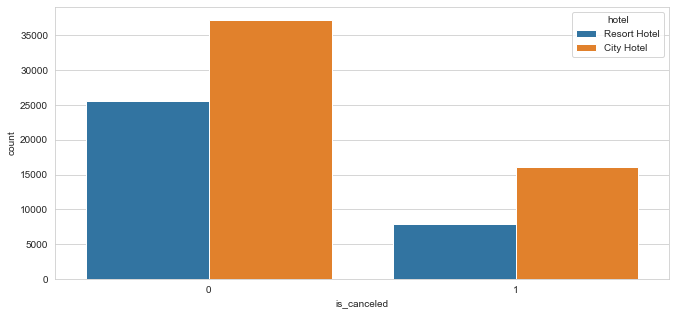

In [8]:
plt.figure(figsize=(11, 5))
sns.set_style("whitegrid")
sns.countplot(data=hotel_df1_clean, x = 'is_canceled', hue='hotel')
plt.show()

## Number of market segment type based on hotel

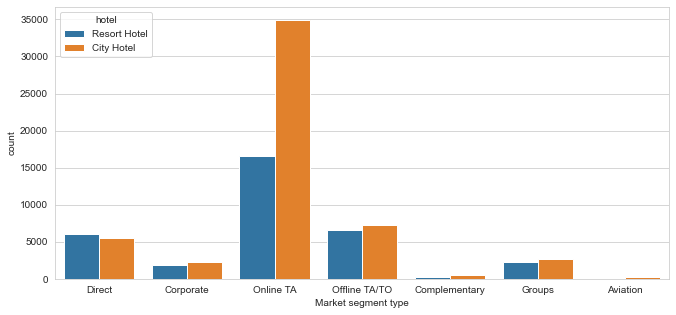

In [9]:
plt.figure(figsize=(11, 5))
sns.set_style("whitegrid")
sns.countplot(data=hotel_df1_clean, x = 'market_segment', hue='hotel')
plt.xlabel("Market segment type")
plt.show()

## Number of distribution channel type based on hotel

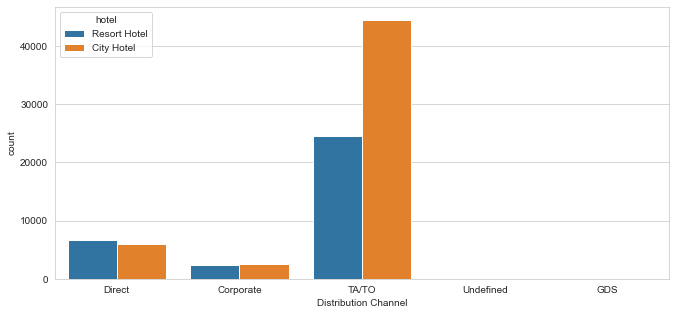

In [10]:
plt.figure(figsize=(11, 5))
sns.set_style("whitegrid")
sns.countplot(data=hotel_df1_clean, x = 'distribution_channel', hue='hotel')
plt.xlabel("Distribution Channel")
plt.show()

## Number of deposit type based on hotel

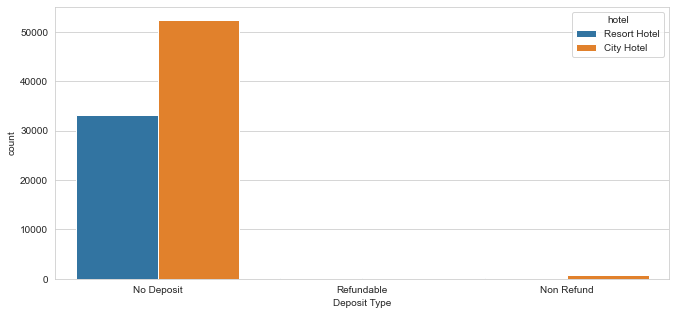

In [11]:
plt.figure(figsize=(11, 5))
sns.set_style("whitegrid")
sns.countplot(data=hotel_df1_clean, x = 'deposit_type', hue='hotel')
plt.xlabel("Deposit Type")
plt.show()

## Number of customer type based on hotel¶

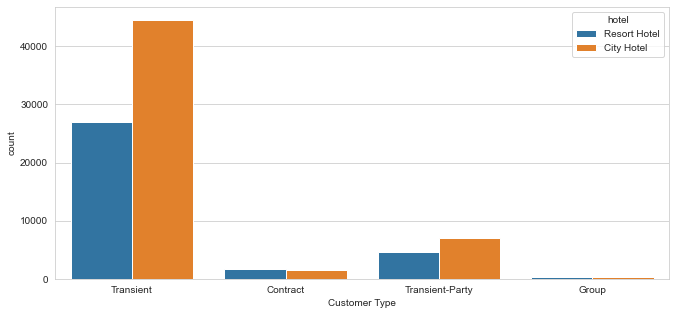

In [12]:
plt.figure(figsize=(11, 5))
sns.set_style("whitegrid")
sns.countplot(data=hotel_df1_clean, x = 'customer_type', hue='hotel')
plt.xlabel("Customer Type")
plt.show()

## Number of meal type based on hotel

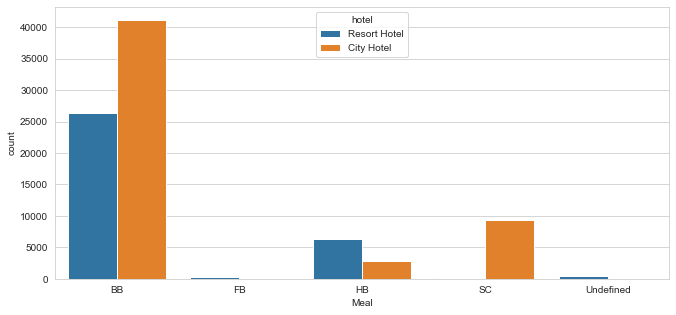

In [13]:
plt.figure(figsize=(11, 5))
sns.set_style("whitegrid")
sns.countplot(data=hotel_df1_clean, x = 'meal', hue='hotel')
plt.xlabel("Meal")
plt.show()

In [15]:
from dbexport import dataToDb

destinationTableName = 'hotel_reservations'

dataToDb(hotel_df1_clean, destinationTableName)